In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt


In [3]:
sentence = pd.read_csv("engtamilTrain.csv")

In [5]:
sentence.head(10)

,Unnamed: 0,en,ta
0,0,MMA vice president Qazi Hussain Ahmad declared...,MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1,1,Information has surfaced in recent years sugge...,சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2,2,And Azor begat Sadoc; and Sadoc begat Achim; a...,ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3,3,"She says she knows what is going on, but can d...",என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4,4,"And be it indeed that I have erred, my error r...","நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ..."
5,5,"Finally, the columnist fails to tell us who am...",டால்ரிம்பிளினுடைய அறிவுஜீவித் தொடுவானத்திற்கு...
6,6,"These include the British Tamil Forum, La Mais...","இந்த அமைப்புக்களில் British Tamil Forum, La Ma..."
7,7,Vijay accompanied with his wife and daughter e...,"தனது மனைவி, மகளுடன் 'அஞ்சாதே' படத்தை ரசித்தார்..."
8,8,Both Musharraf and Vajpayee have exploited the...,முஷாரப் மற்றும் வாஜ்பாயி இருவருமே அவர்களது நாட...
9,9,But what happened?\n,ஆனால் என்ன ஆனது?\n


In [7]:
sentence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166871 entries, 0 to 166870
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  166871 non-null  int64 
 1   en          166871 non-null  object
 2   ta          166871 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


In [9]:
train = sentence.drop(["Unnamed: 0"],axis=1)
train.head()

,en,ta
0,MMA vice president Qazi Hussain Ahmad declared...,MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1,Information has surfaced in recent years sugge...,சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2,And Azor begat Sadoc; and Sadoc begat Achim; a...,ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3,"She says she knows what is going on, but can d...",என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4,"And be it indeed that I have erred, my error r...","நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ..."


In [11]:
import tensorflow as keras
from tensorflow.keras.layers import Embedding #LSTM, Dense
from tensorflow.keras.models import Sequential

In [12]:
english_sentences = train["en"]
tamil_sentences = train["ta"]

In [15]:
english_sentences = english_sentences.head(1000)
tamil_sentences = tamil_sentences.head(1000)

In [17]:
english_sentences

0      MMA vice president Qazi Hussain Ahmad declared...
1      Information has surfaced in recent years sugge...
2      And Azor begat Sadoc; and Sadoc begat Achim; a...
3      She says she knows what is going on, but can d...
4      And be it indeed that I have erred, my error r...
                             ...                        
995    A face that stays on in people's mind is impor...
996    According to a report distributed by the Pales...
997    In a fundraising letter to big contributors, B...
998    It is entirely appropriate that outraged prote...
999    Against him there exists nothing, and he knows...
Name: en, Length: 1000, dtype: object

In [19]:
def sentToken(sentence):
    dataset = sentence

    sentences = [sentence.split() for sentence in dataset]

    print(sentences)
    return sentences

In [21]:
engSentence = sentToken(english_sentences)

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

In [23]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [41]:
def ounWordModel(langsentence, modelname):
    from gensim.models import Word2Vec
    import matplotlib.pyplot as plt
    model = Word2Vec(langsentence,min_count=1)
    print(model)

    model.save(modelname)
    # fit a 2d PCA model to the vectors
    X = model.wv.vectors # corrected line
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    # Create a scatter plot of the projections
    plt.scatter(result[:,0], result[:,1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i,0], result[i,1]))
    plt.show()
    
    #print(model.wv.most_similar('election'))
    #print(model.wv['president'])

Word2Vec<vocab=7300, vector_size=100, alpha=0.025>


C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


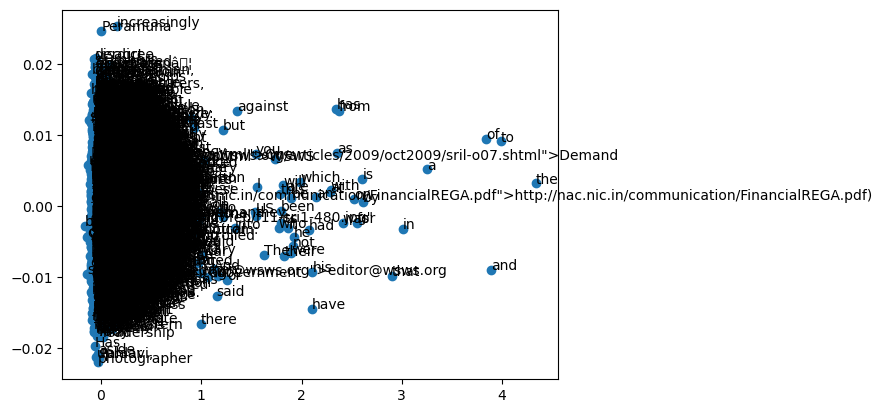

In [43]:
ounWordModel(engSentence,"engmodel.bin")